# Regularization (Ridge(L2) and Lasso(L1))

In [1]:
import pandas as pd

In [3]:
cars= pd.read_csv(r"C:\Users\acreddy\Desktop\abc\LinearRegression_CarsDataSet\data\cars_preprocessed_data.csv")

In [4]:
cars.head(2)

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


# Ridge Regression (aka L2 Regularization):

In [5]:
# divide Target and Independent variables
X= cars.drop("price", axis=1)
y= cars["price"]

In [6]:
# lets split the data in to train and test datasets
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [8]:
len(X_train), len(y_train)

(153, 153)

In [9]:
len(X_test), len(y_test)

(52, 52)

In [10]:
# lets scale the data
from sklearn.preprocessing import StandardScaler

In [11]:
# initialize the scaler
scaler= StandardScaler()

In [12]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [13]:
# lets build the model(Ridge)
from sklearn.linear_model import Ridge

In [14]:
# initialize the model (and defining the Ridge parameter lambda(alpha)= 1)
alpha= 1.0
ridge= Ridge(alpha= alpha)

In [15]:
# lets fit the model on train data
ridge.fit(X_train_scaled, y_train)

Ridge()

In [16]:
# lets get the paramters from the model
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficients for {}: {}".format(col_name, ridge.coef_[idx]))

The Coefficients for symboling: 286.7859187485099
The Coefficients for wheel_base: 425.8700489341316
The Coefficients for length: -138.28308659502807
The Coefficients for width: 653.7405087491885
The Coefficients for height: 465.5139374826724
The Coefficients for curb_weight: -237.01380033231044
The Coefficients for num_of_cylinders: -2318.2750776666708
The Coefficients for engine_size: 8049.255803709751
The Coefficients for bore: -1209.421875642534
The Coefficients for stroke: -1422.4465341021487
The Coefficients for compression_ratio: 1168.8202568602371
The Coefficients for horsepower: 30.669614422902967
The Coefficients for peak_rpm: 1233.2185657761465
The Coefficients for city_mpg: -1015.0321389961407
The Coefficients for highway_mpg: -887.1942721376397


In [17]:
# intercept
intercept= ridge.intercept_
intercept

13238.418300653595

In [18]:
# evaluate the model
y_pred= ridge.predict(X_test_scaled)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

r2_square= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)

In [20]:
r2_square

0.7948497557372288

In [21]:
mse

13776752.40009319

In [22]:
import matplotlib.pyplot as plt

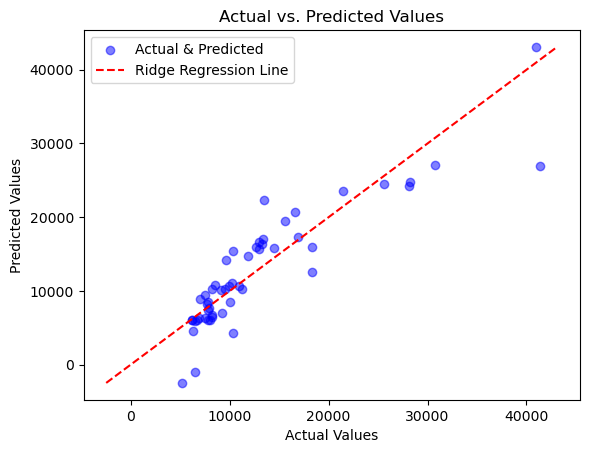

In [23]:
# visualize the model fit
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Actual & Predicted")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ridge Regression Line")


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

Note: We can try the Ridge Regression for different values of alpha(lambda) and see what alpha value is giving the best fit.
      Its a hyper-parameter and we can get this value using cross-validation techniques. Same thing applicable for Lasso as           well.

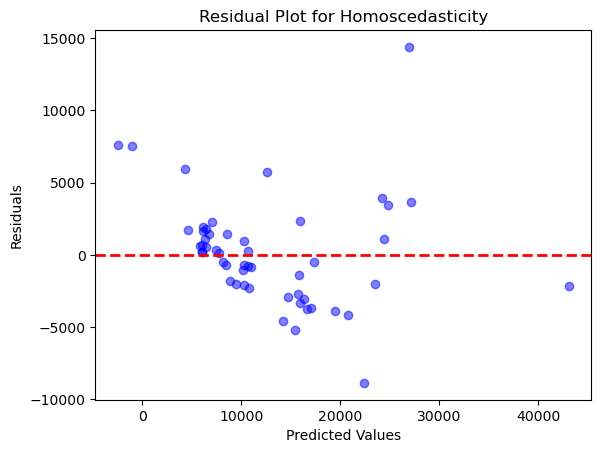

In [25]:
# check the homoscedasticity and heteroscedasticity by plotting the Residuals

residuals= y_test - y_pred

plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle= "--", linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity")
plt.show()

# Lasso Regression (aka L1 Regularization)

In [26]:
from sklearn.linear_model import Lasso

In [27]:
# initialize the model (taken alpha =1 same as the above)
alpha= 0.5
lasso= Lasso(alpha=alpha)

In [28]:
# fit the model on train data
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.5)

In [29]:
# lets get the paramters from the model
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficients for {}: {}".format(col_name, lasso.coef_[idx]))

The Coefficients for symboling: 136.46395059058602
The Coefficients for wheel_base: 338.0871424418989
The Coefficients for length: -275.54528050456577
The Coefficients for width: 821.8945532837815
The Coefficients for height: 544.0339006377858
The Coefficients for curb_weight: -649.505506249567
The Coefficients for num_of_cylinders: -3212.324351940233
The Coefficients for engine_size: 9431.771756100472
The Coefficients for bore: -1570.7790310397434
The Coefficients for stroke: -1654.6497735794972
The Coefficients for compression_ratio: 1275.097271036021
The Coefficients for horsepower: -23.44726523516537
The Coefficients for peak_rpm: 1305.7793963701397
The Coefficients for city_mpg: -1221.8618232220265
The Coefficients for highway_mpg: -799.6755852421925


In [30]:
# intercept
intercept= lasso.intercept_
intercept

13238.418300653595

In [31]:
y_pred_lasso= lasso.predict(X_test_scaled)

In [32]:
r2_square_lasso= r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [33]:
r2_square_lasso

0.7980040510915792

In [34]:
mse_lasso

13564927.421527784

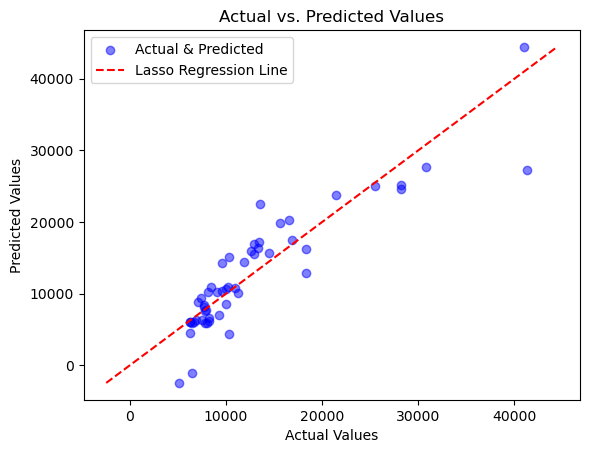

In [35]:
# visualize the model fit
plt.scatter(y_test, y_pred_lasso, color="blue", alpha=0.5, label="Actual & Predicted")

min_val = min(min(y_test), min(y_pred_lasso))
max_val = max(max(y_test), max(y_pred_lasso))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Lasso Regression Line")


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

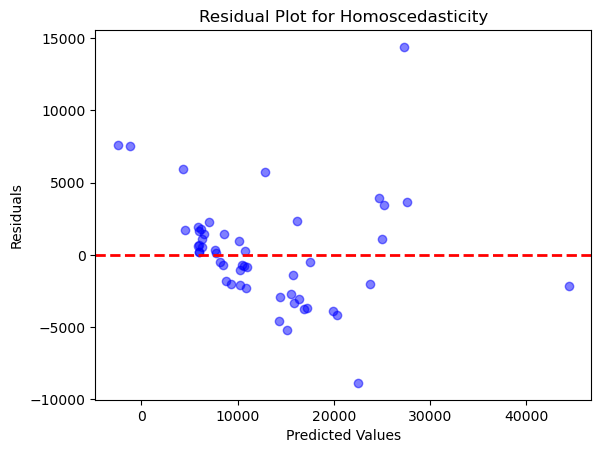

In [36]:
# check the homoscedasticity and heteroscedasticity by plotting the Residuals
residual= y_test - y_pred_lasso
plt.scatter(y_pred_lasso, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle= "--", linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Homoscedasticity")
plt.show()

Conclusion:  Both L1 and L2 model's residuals are not homogeneous, plot is not showing any homoscedasticity. 
             Over all model seems like not reliable. I believe there is a lot of collinearity between features, 
             so model is not fitting as expected.